<a href="https://colab.research.google.com/github/naman065/EE-655-/blob/main/EE_655_ASSN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EE-655 Assignment-2**
*Naman Mohan Singh*

**I have used two ways to find the response of the filters on the given image**


1.   Using **OpenCV** library function to calculate the integral image and then
     apply the filters

2.   Defined a custom function to calculate the integral image and then to apply the filters using integral image concept


```
def apply_filter(integral_image, filter):
  
    filter_size = filter.shape[0]
    h, w = integral_image.shape
    response = np.zeros((h - filter_size, w - filter_size), dtype=np.float32)

    for i in range(h - filter_size):
        for j in range(w - filter_size):
            sum_white = 0
            sum_black = 0

            for fi in range(filter_size):
                for fj in range(filter_size):
                    x, y = i + fi, j + fj
                    if filter[fi, fj] == 1:
                        sum_white += compute_region_sum(integral_image, x, y, x, y)
                    elif filter[fi, fj] == -1:
                        sum_black += compute_region_sum(integral_image, x, y, x, y)

            response[i, j] = sum_white - sum_black

    return response
```





`Different results and runtime are obtained in both the methods with the 1st one being more accurate and faster than the 2nd one!`



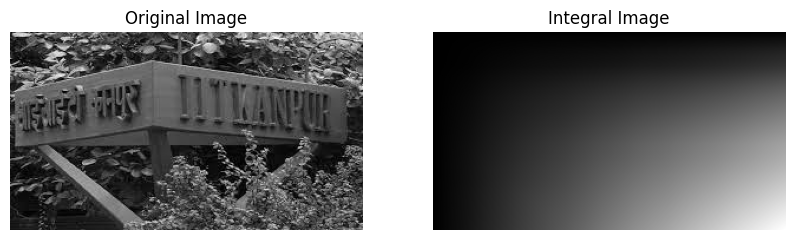

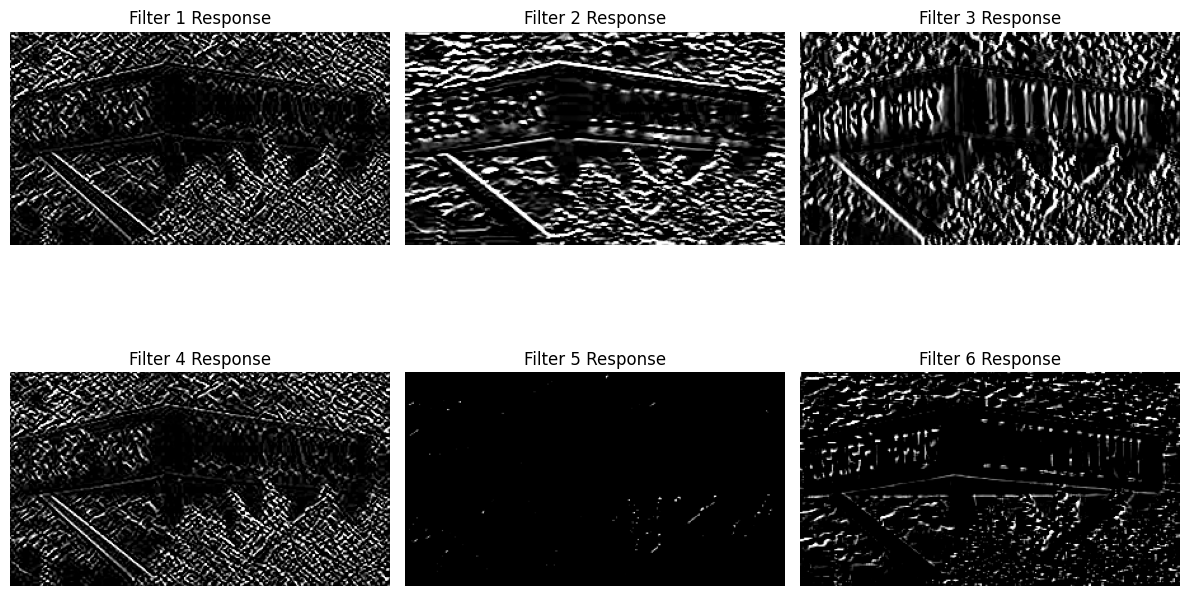

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/content/iitk_dcbc8fcc-7655-4c6f-bb89-3a0b56dbbfbe.png", cv2.IMREAD_GRAYSCALE)

# Computing the integral image using OpenCV
integral_image = cv2.integral(image)[1:, 1:]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(integral_image, cmap='gray')
plt.title("Integral Image")
plt.axis("off")

plt.show()

filter1 = np.array([[-1, -1, 1, 1],
                     [-1, -1, 1, 1],
                     [1, 1, -1, -1],
                     [1, 1, -1, -1]])

filter2 = np.array([[-1, -1, -1, -1],
                     [-1, -1, -1, -1],
                     [1, 1, 1, 1],
                     [1, 1, 1, 1]])

filter3 = np.array([[-1, -1, 1, 1],
                     [-1, -1, 1, 1],
                     [-1, -1, 1, 1],
                     [-1, -1, 1, 1]])

filter4 = np.array([[1, 1, -1, -1],
                     [1, 1, -1, -1],
                     [-1, -1, 1, 1],
                     [-1, -1, 1, 1]])

filter5 = np.array([[-1, -1, -1, -1],
                     [-1, -1, -1, -1],
                     [-1, -1, 1, 1],
                     [-1, -1, 1, 1]])

filter6 = np.array([[1, 1, 1, 1],
                     [1, -1, -1, -1],
                     [1, -1, -1, -1],
                     [1, -1, -1, -1]])

filters = [filter1, filter2, filter3, filter4, filter5, filter6]

plt.figure(figsize=(12, 8))

# Applying each filter using OpenCV's filter2D function
for idx, filter_mask in enumerate(filters):
    response = cv2.filter2D(image, -1, filter_mask)

    plt.subplot(2, 3, idx + 1)
    plt.imshow(response, cmap='gray')
    plt.title(f"Filter {idx+1} Response")
    plt.axis("off")

plt.tight_layout()
plt.show()


<ipython-input-27-d90ae5d103fb>:20: RuntimeWarning: overflow encountered in scalar subtract
  return A - B - C + D
<ipython-input-27-d90ae5d103fb>:20: RuntimeWarning: overflow encountered in scalar add
  return A - B - C + D


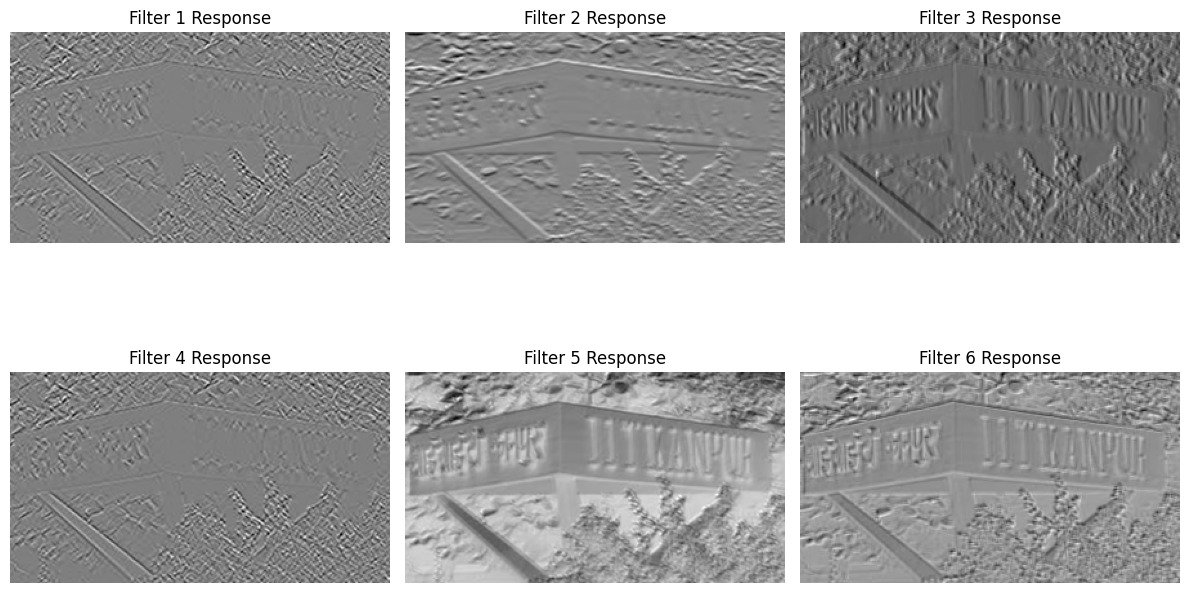

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_integral_image(image):
    """Computes the integral image."""
    return np.cumsum(np.cumsum(image, axis=0), axis=1)


def compute_region_sum(integral, x1, y1, x2, y2):
    """
    Computes the sum of a rectangular region using the integral image.
    The region is defined by top-left (x1, y1) and bottom-right (x2, y2).
    """
    A = integral[x2, y2]
    B = integral[x1 - 1, y2] if x1 > 0 else 0
    C = integral[x2, y1 - 1] if y1 > 0 else 0
    D = integral[x1 - 1, y1 - 1] if x1 > 0 and y1 > 0 else 0

    return A - B - C + D

def apply_filter(integral_image, filter):

    filter_size = filter.shape[0]
    h, w = integral_image.shape
    response = np.zeros((h - filter_size, w - filter_size), dtype=np.float32)

    for i in range(h - filter_size):
        for j in range(w - filter_size):
            sum_white = 0
            sum_black = 0

            for fi in range(filter_size):
                for fj in range(filter_size):
                    x, y = i + fi, j + fj
                    if filter[fi, fj] == 1:
                        sum_white += compute_region_sum(integral_image, x, y, x, y)
                    elif filter[fi, fj] == -1:
                        sum_black += compute_region_sum(integral_image, x, y, x, y)

            response[i, j] = sum_white - sum_black

    return response

image = cv2.imread('/content/iitk_dcbc8fcc-7655-4c6f-bb89-3a0b56dbbfbe.png', cv2.IMREAD_GRAYSCALE)

integral_image = compute_integral_image(image)

filters = [
    np.array([[-1, -1,  1,  1], [-1, -1,  1,  1], [ 1,  1, -1, -1], [ 1,  1, -1, -1]]),
    np.array([[-1, -1, -1, -1], [-1, -1, -1, -1], [ 1,  1,  1,  1], [ 1,  1,  1,  1]]),
    np.array([[-1, -1,  1,  1], [-1, -1,  1,  1], [-1, -1,  1,  1], [-1, -1,  1,  1]]),
    np.array([[ 1,  1, -1, -1], [ 1,  1, -1, -1], [-1, -1,  1,  1], [-1, -1,  1,  1]]),
    np.array([[-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1,  1,  1], [-1, -1,  1,  1]]),
    np.array([[ 1,  1,  1,  1], [ 1, -1, -1, -1], [ 1, -1, -1, -1], [ 1, -1, -1, -1]])
]

plt.figure(figsize=(12, 8))

for idx, filter in enumerate(filters):
    response = apply_filter(integral_image, filter)

    plt.subplot(2, 3, idx + 1)
    plt.imshow(response, cmap='gray')
    plt.title(f"Filter {idx+1} Response")
    plt.axis("off")

plt.tight_layout()
plt.show()
